# Food Image 101 classes Classifier - Computer Vision

This notebook demonstrates the implementation of several deep learning models and computer vision experiments to classify images of 101 different food classes using TensorFlow. The optimal model achieves an accuracy of **80%** on the full test set, showcasing the effectiveness of transfer learning with fine-tuning, 'mixed precision training' and various callback techniques. This performance surpasses the baseline accuracy of 50.76% on 101 classes as reported in the original [Food101 paper](https://data.vision.ee.ethz.ch/cvl/datasets_extra/food-101/static/bossard_eccv14_food-101.pdf) using only **10%** of the training data, and exceeds the 77.4% accuracy benchmark established by the [DeepFood](https://www.researchgate.net/publication/304163308_DeepFood_Deep_Learning-Based_Food_Image_Recognition_for_Computer-Aided_Dietary_Assessment) paper, using **100%** of the training data.

### Instructions for Running the Notebook
**1. Clone the Repository:** Ensure you have cloned the repository to your local machine or directly open it in Google Colab.

**2. Dataset Preparation:** The datasets used in this notebook have been preprocessed in the 'Organizing_The_Food101_Dataset' notebook of this project, and stored in my Google Drive. They can be accessed and downloaded directly from the provided links within the notebook. Additionally, we are using the same dataset from TensorFlow datasets [(TFDS)](https://www.tensorflow.org/datasets/overview) for 'model_4'.

**3. Dependencies:** Install the required libraries by running the provided cells in the notebook.

**4. Execution:** Follow the cells sequentially to load the data, preprocess it, build the model, and evaluate its performance. Detailed explanations and code comments are provided for each step.

**5. Helper Functions:** The project includes a file named 'helper_functions.py' stored in the 'scripts' folder in the project's Github repository. This file contains utility functions needed for data processing and model evaluation, and is imported in this notebook.

## TensorFlow Version Checking

In [1]:
import tensorflow as tf

print(f"TensorFlow version: {tf.__version__}")

TensorFlow version: 2.15.0


## GPU Checking

We will utilize **"mixed precision training"** in some of the models, which requires access to a GPU with a compute capability score of 7.0 or higher, such as the NVIDIA Tesla T4. Therefore, it is essential to ensure that we have a compatible GPU available:

In [2]:
!nvidia-smi

Sun May 26 10:38:11 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   49C    P8              11W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

## Get the Data (10% of the train data)

For the next two model experiments ('model_1' and 'model_2'), we will utilize **10%** of the **101** classes training set. This dataset is publicly accessible on my Google Drive account and will be downloaded from there. Additionally, we will clone my GitHub repository to retrieve the necessary auxiliary functions located in the 'helper_functions.py' file within the 'scripts' folder of the repository.

The goal of these two experiments is to surpass the baseline accuracy of 50.76% on 101 classes as reported in the original [Food101 paper](https://data.vision.ee.ethz.ch/cvl/datasets_extra/food-101/static/bossard_eccv14_food-101.pdf), using only **10%** of the training data.

In [3]:
# Clone the Github repository (if you haven't yet)
!git clone https://github.com/IsraelAzoulay/food-image-101-classes-classifier-computer-vision.git

Cloning into 'food-image-101-classes-classifier-computer-vision'...
remote: Enumerating objects: 32, done.
remote: Counting objects: 100% (32/32), done.
remote: Compressing objects: 100% (26/26), done.
remote: Total 32 (delta 2), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (32/32), 1.59 MiB | 10.21 MiB/s, done.
Resolving deltas: 100% (2/2), done.


In [4]:
# Navigate to the project directory
%cd food-image-101-classes-classifier-computer-vision

# Add the scripts folder to the Python path
import sys
sys.path.append('/content/food-image-101-classes-classifier-computer-vision/scripts')

# Import the helper functions
from helper_functions import create_tensorboard_callback, plot_loss_curves, unzip_data, compare_historys, walk_through_dir

/content/food-image-101-classes-classifier-computer-vision


Download the dataset from the Google Drive account:

In [5]:
# Install gdown if not already installed
!pip install gdown

In [6]:
# Download the '101_food_classes_10_percent' dataset
!gdown --id 136DFu1cRdqNh-gDLCtX-tquFUyx_cQTC

# Unzip the dataset file by using the 'unzip_data()' function we have imported from the 'helper_functions.py' script
unzip_data("101_food_classes_10_percent.zip")

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:132: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=136DFu1cRdqNh-gDLCtX-tquFUyx_cQTC
From (redirected): https://drive.google.com/uc?id=136DFu1cRdqNh-gDLCtX-tquFUyx_cQTC&confirm=t&uuid=0c65bcb7-7301-4d2c-b0ae-21856c0fecf6
To: /content/food-image-101-classes-classifier-computer-vision/101_food_classes_10_percent.zip
100% 1.63G/1.63G [00:40<00:00, 40.0MB/s]


## Inspect the data

In [7]:
# Display the contnent of the dataset
walk_through_dir("101_food_classes_10_percent")

There are 2 directories and 0 images in '101_food_classes_10_percent'.
There are 101 directories and 0 images in '101_food_classes_10_percent/train'.
There are 0 directories and 75 images in '101_food_classes_10_percent/train/bruschetta'.
There are 0 directories and 75 images in '101_food_classes_10_percent/train/pizza'.
There are 0 directories and 75 images in '101_food_classes_10_percent/train/red_velvet_cake'.
There are 0 directories and 75 images in '101_food_classes_10_percent/train/creme_brulee'.
There are 0 directories and 75 images in '101_food_classes_10_percent/train/bibimbap'.
There are 0 directories and 75 images in '101_food_classes_10_percent/train/risotto'.
There are 0 directories and 75 images in '101_food_classes_10_percent/train/peking_duck'.
There are 0 directories and 75 images in '101_food_classes_10_percent/train/churros'.
There are 0 directories and 75 images in '101_food_classes_10_percent/train/spaghetti_bolognese'.
There are 0 directories and 75 images in '101

## Preprocess the data

Let's establish the training and testing dataloaders as 'PrefetchDataset' datatype to enhance the loading speed:

**Note:** We set the test set in the test dataloader to 'shuffle=False' in order to perform repeatable evaluation and visualization on it later.

In [8]:
# Create training and test directories
train_dir = "101_food_classes_10_percent/train/"
test_dir = "101_food_classes_10_percent/test/"

In [9]:
import tensorflow as tf

# Define the target size of the images to load in
IMG_SIZE = (224, 224)

# Create training data input (dataloader)
train_data_all_10_percent = tf.keras.preprocessing.image_dataset_from_directory(train_dir,
                                                                                label_mode="categorical",
                                                                                image_size=IMG_SIZE)

# Create testing data input (dataloader)
test_data = tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                                label_mode="categorical",
                                                                image_size=IMG_SIZE,
                                                                shuffle=False)

Found 7575 files belonging to 101 classes.
Found 25250 files belonging to 101 classes.


In [10]:
# Let's confirm that the training data datatype is as 'PrefetchDataset'
train_data_all_10_percent

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 101), dtype=tf.float32, name=None))>

In [11]:
# Display the class names in the dataset
train_data_all_10_percent.class_names

['apple_pie',
 'baby_back_ribs',
 'baklava',
 'beef_carpaccio',
 'beef_tartare',
 'beet_salad',
 'beignets',
 'bibimbap',
 'bread_pudding',
 'breakfast_burrito',
 'bruschetta',
 'caesar_salad',
 'cannoli',
 'caprese_salad',
 'carrot_cake',
 'ceviche',
 'cheese_plate',
 'cheesecake',
 'chicken_curry',
 'chicken_quesadilla',
 'chicken_wings',
 'chocolate_cake',
 'chocolate_mousse',
 'churros',
 'clam_chowder',
 'club_sandwich',
 'crab_cakes',
 'creme_brulee',
 'croque_madame',
 'cup_cakes',
 'deviled_eggs',
 'donuts',
 'dumplings',
 'edamame',
 'eggs_benedict',
 'escargots',
 'falafel',
 'filet_mignon',
 'fish_and_chips',
 'foie_gras',
 'french_fries',
 'french_onion_soup',
 'french_toast',
 'fried_calamari',
 'fried_rice',
 'frozen_yogurt',
 'garlic_bread',
 'gnocchi',
 'greek_salad',
 'grilled_cheese_sandwich',
 'grilled_salmon',
 'guacamole',
 'gyoza',
 'hamburger',
 'hot_and_sour_soup',
 'hot_dog',
 'huevos_rancheros',
 'hummus',
 'ice_cream',
 'lasagna',
 'lobster_bisque',
 'lobster

## Create and Evaluate with 'model_1' - Transfer Learning Feature Extraction model, using the Keras Functional API + Data Augmentation

Let's implement a ModelCheckpoint callback that exclusively saves the model's weights only, ensuring that only the optimal (best) weights are preserved rather than the entire model after each epoch:

In [12]:
# Define the ModelCheckpoint path
checkpoint_path = "101_classes_10_percent_data_model_checkpoint"

# Create the ModelCheckpoint callback
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(checkpoint_path,
                                                         save_weights_only=True,
                                                         monitor="val_accuracy", # Save the model weights which score the best validation accuracy
                                                         save_best_only=True)

Let's proceed by creating a **data augmentation model** using the Sequential API. Subsequently, we will integrate this data augmentation model **as a layer** within the Functional API model. This approach ensures that if we decide to continue training the model in the future, the data augmentation will already be incorporated. Given that we are working with a reduced training set (only **10%** of the training data), this strategy will be instrumental in mitigating **overfitting** on the training data:

In [13]:
# Import the required modules for model creation
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

# Create a Data augmentation model with the Sequential API
data_augmentation = Sequential([
  layers.RandomFlip("horizontal"),
  layers.RandomRotation(0.2),
  layers.RandomZoom(0.2),
  layers.RandomHeight(0.2),
  layers.RandomWidth(0.2),
], name ="data_augmentation")

In [14]:
# Create a 'EfficientNetV2B0' base model with tf.keras.applications
base_model = tf.keras.applications.efficientnet.EfficientNetB0(include_top=False) # Setting 'include_top' to 'False', because we will create our own top layers, which are the output layers for the model
# Freeze freeze all of the weights in the 'base_model' pre-trained model, so the pre-learned patterns remain as they currently are
base_model.trainable = False

# Create an input layer for the 'model'
inputs = layers.Input(shape=(224, 224, 3), name="input_layer")
# Pass the inputs to the 'data_augmentation' sequential model we have created earlier (it will augment the images only during the training proccess)
x = data_augmentation(inputs)
# Pass the inputs to the 'base_model' and set it to inference mode so we can use it to extract features without updating the weights (the 'EfficientNetV2B0' inputs don't have to be normalized, since this base model already has built-in normalization)
x = base_model(x, training=False)
# Average pool the outputs of the base model - aggregate all the most important information, and reduce the number of computations (condenses the outputs of the 'base_model' into a shape usable by the output Dense layer)
x = layers.GlobalAveragePooling2D(name="global_average_pooling")(x)
# Create the output Dense layer
outputs = layers.Dense(len(train_data_all_10_percent.class_names), activation="softmax", name="output_layer")(x)

# Combine the inputs and the outputs into 'model'
model = tf.keras.Model(inputs, outputs)

16705208/16705208 [==============================] - 2s 0us/step


In [15]:
# Display the summary of the whole 'model_1' model
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 data_augmentation (Sequent  (None, None, None, 3)     0         
 ial)                                                            
                                                                 
 efficientnetb0 (Functional  (None, None, None, 1280   4049571   
 )                           )                                   
                                                                 
 global_average_pooling (Gl  (None, 1280)              0         
 obalAveragePooling2D)                                           
                                                                 
 output_layer (Dense)        (None, 101)               129381    
                                                             

In [16]:
# Compile the model
model.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
history_all_classes_10_percent = model.fit(train_data_all_10_percent,
                                           epochs=5,
                                           validation_data=test_data,
                                           # Validate on 25% of the validation set (which in our case is the test set) for a faster fitting
                                           validation_steps=int(0.15 * len(test_data)),
                                           callbacks=[checkpoint_callback])

Epoch 1/5
237/237 [==============================] - 161s 631ms/step - loss: 3.3690 - accuracy: 0.2733 - val_loss: 2.4224 - val_accuracy: 0.4886
Epoch 2/5
237/237 [==============================] - 101s 425ms/step - loss: 2.1934 - accuracy: 0.4950 - val_loss: 2.0002 - val_accuracy: 0.5291
Epoch 3/5
237/237 [==============================] - 98s 412ms/step - loss: 1.8123 - accuracy: 0.5612 - val_loss: 1.8400 - val_accuracy: 0.5379
Epoch 4/5
237/237 [==============================] - 81s 340ms/step - loss: 1.5897 - accuracy: 0.6116 - val_loss: 1.8014 - val_accuracy: 0.5379
Epoch 5/5
237/237 [==============================] - 77s 324ms/step - loss: 1.4404 - accuracy: 0.6448 - val_loss: 1.7533 - val_accuracy: 0.5463


In [17]:
# Evaluate the model on the full test data
results_feature_extraction_model = model.evaluate(test_data)
results_feature_extraction_model

790/790 [==============================] - 57s 72ms/step - loss: 1.5758 - accuracy: 0.5863


[1.575846791267395, 0.5862573981285095]

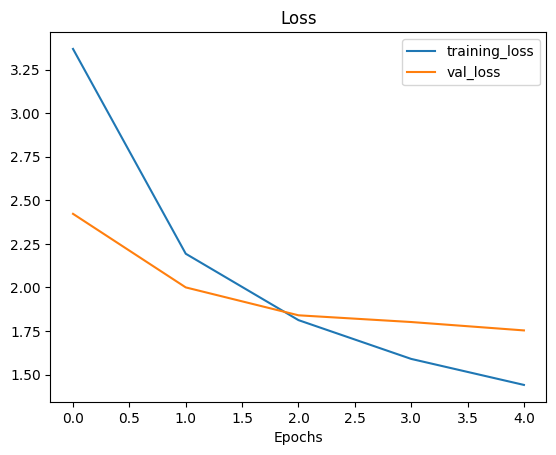

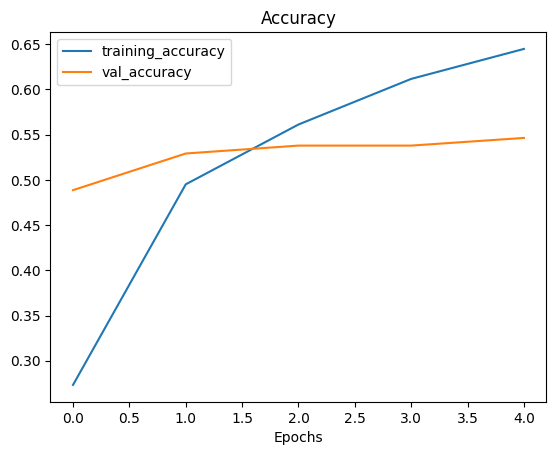

In [18]:
# Display the model's_1 training loss and accurcy curves
plot_loss_curves(history_all_classes_10_percent)

**Note:** Ideally, the two curves should closely resemble one another. Significant discrepancies between them may indicate the presence of **overfitting** or **underfitting**.

## Create and Evaluate with 'model_2' - Transfer Learning Fine Tuning model, using the Keras Functional API + Data Augmentation

In the 'model_2' experiment, we will implement Transfer Learning by **Fine-Tuning** the 'model_1' checkpoint on **10%** of the training data with data augmentation. This process involves customizing the pre-trained model to better fit our specific data. Specifically, we will use the same base model, unfreeze some of its top layers, and train the model for additional epochs:

In [19]:
# Make all the layers in the 'base_model' of 'model_1' trainable
base_model.trainable = True

# Freeze all the layers except of the last 5 layers
for layer in base_model.layers[:-5]:
  layer.trainable = False

In [20]:
# Recompile the entire 'model_2' (which is in fact the 'model_1' fine-tuned), because we have made an adjustment to the model ('model_1')
model.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(1e-4), # Decrease the learning rate is 10x for fine tuning
              metrics=['accuracy'])

In [21]:
# Print which layers in the model are trainable now
for layer in model.layers:
  print(layer.name, layer.trainable)

input_layer True
data_augmentation True
efficientnetb0 True
global_average_pooling True
output_layer True


In [22]:
# Find out which layers are trainable
for layer_number, layer in enumerate(base_model.layers):
  print(layer_number, layer.name, layer.trainable)

0 input_1 False
1 rescaling False
2 normalization False
3 rescaling_1 False
4 stem_conv_pad False
5 stem_conv False
6 stem_bn False
7 stem_activation False
8 block1a_dwconv False
9 block1a_bn False
10 block1a_activation False
11 block1a_se_squeeze False
12 block1a_se_reshape False
13 block1a_se_reduce False
14 block1a_se_expand False
15 block1a_se_excite False
16 block1a_project_conv False
17 block1a_project_bn False
18 block2a_expand_conv False
19 block2a_expand_bn False
20 block2a_expand_activation False
21 block2a_dwconv_pad False
22 block2a_dwconv False
23 block2a_bn False
24 block2a_activation False
25 block2a_se_squeeze False
26 block2a_se_reshape False
27 block2a_se_reduce False
28 block2a_se_expand False
29 block2a_se_excite False
30 block2a_project_conv False
31 block2a_project_bn False
32 block2b_expand_conv False
33 block2b_expand_bn False
34 block2b_expand_activation False
35 block2b_dwconv False
36 block2b_bn False
37 block2b_activation False
38 block2b_se_squeeze False
39

In [23]:
# Set the the total number of epochs to 10, meaning that fine tune for another 5 epochs (the model was already trained on 5 epochs in the previous experiment)
fine_tune_epochs = 10

history_all_classes_10_percent_fine_tune = model.fit(train_data_all_10_percent,
                                                     epochs=fine_tune_epochs,
                                                     validation_data=test_data,
                                                     # Validate only on 15% of the validation set (which in our case is the test set) for a faster fitting
                                                     validation_steps=int(0.15 * len(test_data)),
                                                     # Make sure to start from the previous last epoch
                                                     initial_epoch=history_all_classes_10_percent.epoch[-1])

Epoch 5/10
237/237 [==============================] - 85s 320ms/step - loss: 1.2211 - accuracy: 0.6829 - val_loss: 1.7148 - val_accuracy: 0.5485
Epoch 6/10
237/237 [==============================] - 63s 264ms/step - loss: 1.0901 - accuracy: 0.7073 - val_loss: 1.7257 - val_accuracy: 0.5495
Epoch 7/10
237/237 [==============================] - 63s 263ms/step - loss: 1.0178 - accuracy: 0.7261 - val_loss: 1.6828 - val_accuracy: 0.5580
Epoch 8/10
237/237 [==============================] - 63s 263ms/step - loss: 0.9430 - accuracy: 0.7442 - val_loss: 1.7070 - val_accuracy: 0.5599
Epoch 9/10
237/237 [==============================] - 60s 253ms/step - loss: 0.8749 - accuracy: 0.7640 - val_loss: 1.6743 - val_accuracy: 0.5689
Epoch 10/10
237/237 [==============================] - 53s 222ms/step - loss: 0.8277 - accuracy: 0.7785 - val_loss: 1.6872 - val_accuracy: 0.5625


In [24]:
# Evaluate 'model_2' on the full test set
results_all_classes_10_percent_fine_tune = model.evaluate(test_data)
results_all_classes_10_percent_fine_tune

790/790 [==============================] - 55s 69ms/step - loss: 1.4818 - accuracy: 0.6095


[1.4818135499954224, 0.6094653606414795]

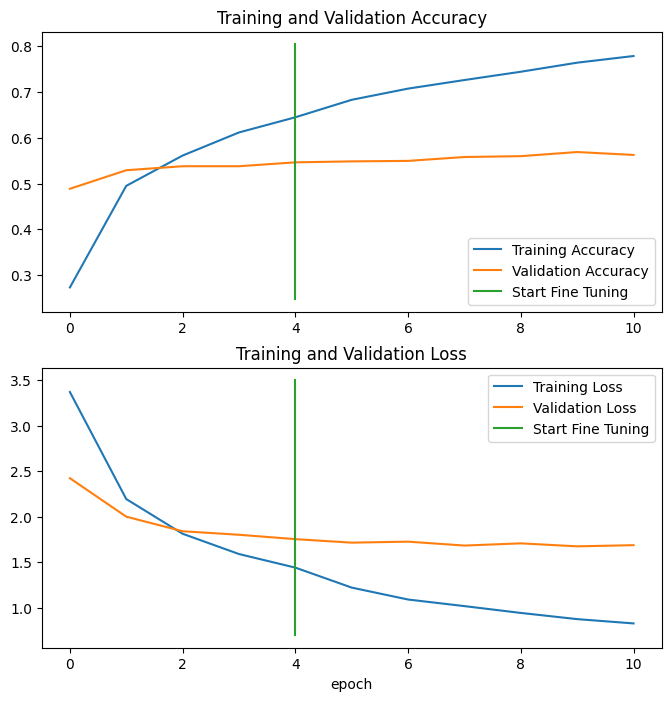

In [25]:
compare_historys(original_history=history_all_classes_10_percent,
                 new_history=history_all_classes_10_percent_fine_tune,
                 initial_epochs=5)

Upon fine-tuning, we noted a substantial improvement in the training metrics of the model. However, the validation metrics didn't reflect the same degree of enhancement, suggesting that the model may be beginning to **overfit**.

This phenomenon is often observed when fine-tuning a pre-trained model on a dataset that closely mirrors the data it was originally trained on. In our scenario, the 'EfficientNetB0' model, which was pre-trained on 'ImageNet', includes numerous real-life images of food similar to those in our custom dataset. Consequently, while feature extraction alone provided strong performance, the incremental benefits of fine-tuning were less pronounced due to the similarity between the datasets.

In [29]:
from google.colab import drive

# Save the model to Google Drive so it can be used later
save_dir = "/content/drive/My Drive/Colab Notebooks/101_food_class_10_percent_model"
model.save(save_dir)

In [30]:
!ls "/content/drive/My Drive/Colab Notebooks"

101_food_class_10_percent_model
BTC_Price_Predictor.ipynb
Food_Image_101_classes_Classifier_Computer_Vision.ipynb
Food_Image_Deca_Classifier_Computer_Vision.ipynb
Organizing_The_Food101_Dataset.ipynb
Prop_Predict.ipynb


## Making predictions with the Fine Tuned model

First, let's load the saved fine-tuned model from Google Drive:

In [31]:
model = tf.keras.models.load_model("/content/drive/My Drive/Colab Notebooks/101_food_class_10_percent_model")

In [32]:
# Make sure the loaded model is the fine-tunded model, let's evaluate it on the full test set
loaded_loss, loaded_accuracy = model.evaluate(test_data)
loaded_loss, loaded_accuracy

790/790 [==============================] - 60s 73ms/step - loss: 1.4818 - accuracy: 0.6095


(1.4818135499954224, 0.6094653606414795)

The performance of the loaded model appears to be consistent with its performance prior to saving. Hence, let's proceed to make some predictions:

In [33]:
# Make predictions on the test set with the model
pred_probs = model.predict(test_data, verbose=1)

790/790 [==============================] - 62s 76ms/step


In [34]:
# Display the number of predictions probabilities
len(pred_probs)

25250

In [35]:
# Display the shape of the predictions
pred_probs.shape

(25250, 101)

In [36]:
# Present the probabilities of the first 10 predictions
pred_probs[:10]

array([[1.9105496e-01, 3.8723953e-04, 7.2879739e-02, ..., 1.1486820e-05,
        5.9046783e-03, 2.7447052e-02],
       [9.7922099e-01, 1.4267266e-08, 1.2844772e-04, ..., 8.3567388e-04,
        2.1434531e-07, 3.1870709e-06],
       [6.9681340e-01, 6.1063217e-03, 1.1390657e-02, ..., 1.7828523e-04,
        8.3050801e-04, 8.3566981e-04],
       ...,
       [2.6675889e-01, 1.3377836e-05, 7.4101804e-04, ..., 1.9239442e-02,
        5.4144184e-04, 1.8500346e-04],
       [3.0247608e-01, 5.7348545e-04, 2.5482523e-01, ..., 2.8311549e-04,
        3.9707418e-04, 3.9687048e-04],
       [7.3798501e-01, 3.2378057e-07, 3.2005133e-04, ..., 1.8167627e-03,
        2.1839346e-06, 4.3065762e-04]], dtype=float32)

In [37]:
# Let's delve further into the prediction probabilities, noting that there is one prediction probability assigned to each class
print(f"Number of prediction probabilities for sample 0: {len(pred_probs[0])}")
print(f"What prediction probability sample 0 looks like:\n {pred_probs[0]}")
print(f"The class with the highest predicted probability by the model for sample 0: {pred_probs[0].argmax()}")

Number of prediction probabilities for sample 0: 101
What prediction probability sample 0 looks like:
 [1.91054955e-01 3.87239532e-04 7.28797391e-02 2.86806056e-07
 6.68369830e-06 1.10787223e-05 3.18495382e-04 1.26580071e-05
 2.97449175e-02 7.21131102e-04 1.77190930e-06 9.58441615e-06
 3.82082158e-04 1.15234161e-06 1.06521249e-02 7.60188792e-04
 1.62162141e-05 1.19710644e-03 3.41995410e-03 1.75301302e-05
 2.83409283e-03 8.13036422e-06 1.90611157e-04 1.68068145e-04
 6.68443798e-04 6.21381542e-03 9.18383070e-04 1.58706796e-04
 2.62606651e-01 2.61860492e-04 3.20177037e-06 1.67172553e-03
 3.89739609e-04 1.70037606e-06 1.41909653e-02 1.28719284e-05
 4.01446072e-04 1.97272561e-03 3.90534922e-02 2.85418995e-04
 1.66073581e-03 1.64450034e-02 3.66463908e-04 1.57659324e-05
 5.03782183e-04 3.14510944e-05 1.73810415e-03 3.20289430e-04
 2.91476658e-06 1.01951435e-01 2.73831363e-04 1.54049398e-04
 4.38688174e-02 1.13711385e-02 5.25915202e-05 3.33079300e-03
 3.43722813e-02 2.83246627e-03 6.27203006e-

To obtain the predicted class index for each sample in the test set, we will identify the index of the highest value in each prediction probability tensor by utilizing the 'argmax()' method:

In [38]:
# Getting the class predicitons of each label
pred_classes = pred_probs.argmax(axis=1)
pred_classes[:10]

array([28,  0,  0,  8,  8, 78, 29,  0,  0,  0])

## Evaluating the model's predictions

To compare the predicted class indices to the test set labels for further model evaluation, we will extract the test set labels from the 'test_data' dataloader object created during the 'Preprocess the Data' step. This dataloader is in the form of a 'tf.data.Dataset'. By applying the 'unbatch()' method, we can access the individual images and their corresponding labels in the test set. Given that the labels are 'one-hot encoded', we will utilize the 'argmax()' method to obtain the index of each label.

**Note:** We set 'shuffle=False' when creating the test data object to ensure that the order of the test dataset remains consistent. Without this, each time the test dataset is loaded (e.g., for making predictions), it would be shuffled. This would result in misaligned predictions and labels, preventing accurate comparison.

In [39]:
# Create an empty list for storing the y_labels
y_labels = []

for images, labels in test_data.unbatch():
  y_labels.append(labels.numpy().argmax())

y_labels[:10]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [40]:
# Display the number of labels, which should correspond to the number of predicted probabilities
len(y_labels)

25250

In [41]:
from sklearn.metrics import accuracy_score

# Evaluate the model's predictions by comparing the predicted classes to the ground truth labels, using the 'accuracy_score()' function from 'sklearn'
sklearn_accuracy = accuracy_score(y_labels, pred_classes)
sklearn_accuracy

0.6094653465346535

In [42]:
import numpy as np

# Let's find out if the evaluate method compares to the Scikit-Learn measured accuracy
print(f"Close? {np.isclose(loaded_accuracy, sklearn_accuracy)} | Difference: {loaded_accuracy - sklearn_accuracy}")

Close? True | Difference: 1.410682604063851e-08


### Visualize the predicions

To begin, let us examine a confusion matrix:

In [43]:
import itertools
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix
from helper_functions import make_confusion_matrix


def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15, norm=False, savefig=False):
  """The function makes a labelled confusion matrix comparing the predictions with the ground truth labels. If classes is passed, the confusion
  matrix will be labelled, if not, the integer class values will be used.

  Args:
    y_true: Array of truth labels (must be same shape as y_pred).
    y_pred: Array of predicted labels (must be same shape as y_true).
    classes: Array of class labels (e.g. string form). If `None`, integer labels are used.
    figsize: Size of output figure (default=(10, 10)).
    text_size: Size of output figure text (default=15).
    norm: normalize values or not (default=False).
    savefig: save confusion matrix to file (default=False).

  Returns:
    A labelled confusion matrix plot comparing y_true and y_pred.

  Example usage:
    make_confusion_matrix(y_true=test_labels, # ground truth test labels
                          y_pred=y_preds, # predicted labels
                          classes=class_names, # array of class label names
                          figsize=(15, 15),
                          text_size=10)
  """
  # Creating the confustion matrix
  cm = confusion_matrix(y_true, y_pred)
  # Normalize
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]
  n_classes = cm.shape[0]

  # Plot
  fig, ax = plt.subplots(figsize=figsize)
  cax = ax.matshow(cm, cmap=plt.cm.Blues)
  fig.colorbar(cax)

  # Find out if there is a list of classes
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])

  # Label the axes
  ax.set(title="Confusion Matrix",
         xlabel="Predicted label",
         ylabel="True label",
         xticks=np.arange(n_classes),
         yticks=np.arange(n_classes),
         # label the axes with the class names if they exist
         xticklabels=labels,
         yticklabels=labels)

  # Make sure the x-axis labels appear on the bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Rotate xticks for readability, and increase the font size since it is a large confusion matrix
  plt.xticks(rotation=70, fontsize=text_size)
  plt.yticks(fontsize=text_size)

  # Define the threshold for various colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on every single cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    if norm:
      plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
              horizontalalignment="center",
              color="white" if cm[i, j] > threshold else "black",
              size=text_size)
    else:
      plt.text(j, i, f"{cm[i, j]}",
              horizontalalignment="center",
              color="white" if cm[i, j] > threshold else "black",
              size=text_size)

  # Save the figure to the current working directory
  if savefig:
    fig.savefig("confusion_matrix.png")

In [44]:
# Get the class names in order to get the predictions and the ground truth labels in their actual names, since they currently are in the form of integers
class_names = test_data.class_names
class_names[:10]

['apple_pie',
 'baby_back_ribs',
 'baklava',
 'beef_carpaccio',
 'beef_tartare',
 'beet_salad',
 'beignets',
 'bibimbap',
 'bread_pudding',
 'breakfast_burrito']

In [45]:
# Plot the confusion matrix with all the 25250 predictions, ground truth labels and the 101 classes
make_confusion_matrix(y_true=y_labels,
                      y_pred=pred_classes,
                      classes=class_names,
                      figsize=(100, 100),
                      text_size=20,
                      norm=False,
                      savefig=True)

It appears that the model tends to misclassify classes that are visually similar. To further evaluate the model's performance, we will use Scikit-Learn's 'classification_report()' function, which provides a detailed analysis of precision, recall, and F1-score for each class:

In [46]:
from sklearn.metrics import classification_report

print(classification_report(y_labels, pred_classes))

              precision    recall  f1-score   support

           0       0.30      0.23      0.26       250
           1       0.48      0.76      0.59       250
           2       0.81      0.51      0.63       250
           3       0.89      0.47      0.61       250
           4       0.59      0.36      0.45       250
           5       0.44      0.46      0.45       250
           6       0.73      0.80      0.76       250
           7       0.82      0.78      0.80       250
           8       0.23      0.60      0.34       250
           9       0.40      0.66      0.50       250
          10       0.54      0.41      0.46       250
          11       0.86      0.55      0.67       250
          12       0.69      0.62      0.65       250
          13       0.53      0.56      0.55       250
          14       0.42      0.67      0.52       250
          15       0.58      0.28      0.38       250
          16       0.74      0.50      0.60       250
          17       0.40    

Let's visualize the results. First, we need to obtain the output of the classification report as a dictionary by setting its 'output_dict' parameter to 'True', as demonstrated below:

In [47]:
# Get a dictionary of the classification report
classification_report_dict = classification_report(y_labels,
                                                   pred_classes,
                                                   output_dict=True)
classification_report_dict

{'0': {'precision': 0.29743589743589743,
  'recall': 0.232,
  'f1-score': 0.2606741573033708,
  'support': 250},
 '1': {'precision': 0.4811083123425693,
  'recall': 0.764,
  'f1-score': 0.5904173106646059,
  'support': 250},
 '2': {'precision': 0.8050314465408805,
  'recall': 0.512,
  'f1-score': 0.6259168704156479,
  'support': 250},
 '3': {'precision': 0.8931297709923665,
  'recall': 0.468,
  'f1-score': 0.6141732283464568,
  'support': 250},
 '4': {'precision': 0.5947712418300654,
  'recall': 0.364,
  'f1-score': 0.45161290322580644,
  'support': 250},
 '5': {'precision': 0.4356060606060606,
  'recall': 0.46,
  'f1-score': 0.44747081712062253,
  'support': 250},
 '6': {'precision': 0.7282608695652174,
  'recall': 0.804,
  'f1-score': 0.7642585551330798,
  'support': 250},
 '7': {'precision': 0.8220338983050848,
  'recall': 0.776,
  'f1-score': 0.7983539094650206,
  'support': 250},
 '8': {'precision': 0.2336448598130841,
  'recall': 0.6,
  'f1-score': 0.3363228699551569,
  'support'

Since the F1-score integrates both precision and recall into a single metric, we will concentrate on this measure:

In [48]:
# Create empty dictionary for storing the f1-score values
class_f1_scores = {}

# Run through the classification report items
for k, v in classification_report_dict.items():
  if k == "accuracy":
    break
  else:
    # Append the class names as well as the f1-scores to the f1-score dictionary
    class_f1_scores[class_names[int(k)]] = v["f1-score"]

class_f1_scores

{'apple_pie': 0.2606741573033708,
 'baby_back_ribs': 0.5904173106646059,
 'baklava': 0.6259168704156479,
 'beef_carpaccio': 0.6141732283464568,
 'beef_tartare': 0.45161290322580644,
 'beet_salad': 0.44747081712062253,
 'beignets': 0.7642585551330798,
 'bibimbap': 0.7983539094650206,
 'bread_pudding': 0.3363228699551569,
 'breakfast_burrito': 0.4977511244377811,
 'bruschetta': 0.4636363636363636,
 'caesar_salad': 0.6731707317073171,
 'cannoli': 0.6540880503144654,
 'caprese_salad': 0.546875,
 'carrot_cake': 0.5201238390092879,
 'ceviche': 0.3783783783783784,
 'cheese_plate': 0.5980861244019139,
 'cheesecake': 0.3833333333333333,
 'chicken_curry': 0.4931506849315068,
 'chicken_quesadilla': 0.6516853932584269,
 'chicken_wings': 0.7533460803059274,
 'chocolate_cake': 0.5668016194331984,
 'chocolate_mousse': 0.3813747228381375,
 'churros': 0.7201565557729941,
 'clam_chowder': 0.7194860813704498,
 'club_sandwich': 0.7184466019417476,
 'crab_cakes': 0.3930885529157667,
 'creme_brulee': 0.7685

Let's convert the 'class_f1_scores' dictionary into a pandas DataFrame and sort it in ascending order to enhance visualization and provide clearer insights:

In [49]:
import pandas as pd

f1_scores = pd.DataFrame({"class_name": list(class_f1_scores.keys()),
                          "f1-score": list(class_f1_scores.values())}).sort_values("f1-score", ascending=False)
f1_scores.head()

class_name  f1-score
33            edamame  0.949807
63           macarons  0.883333
69            oysters  0.867076
32          dumplings  0.855397
54  hot_and_sour_soup  0.848485

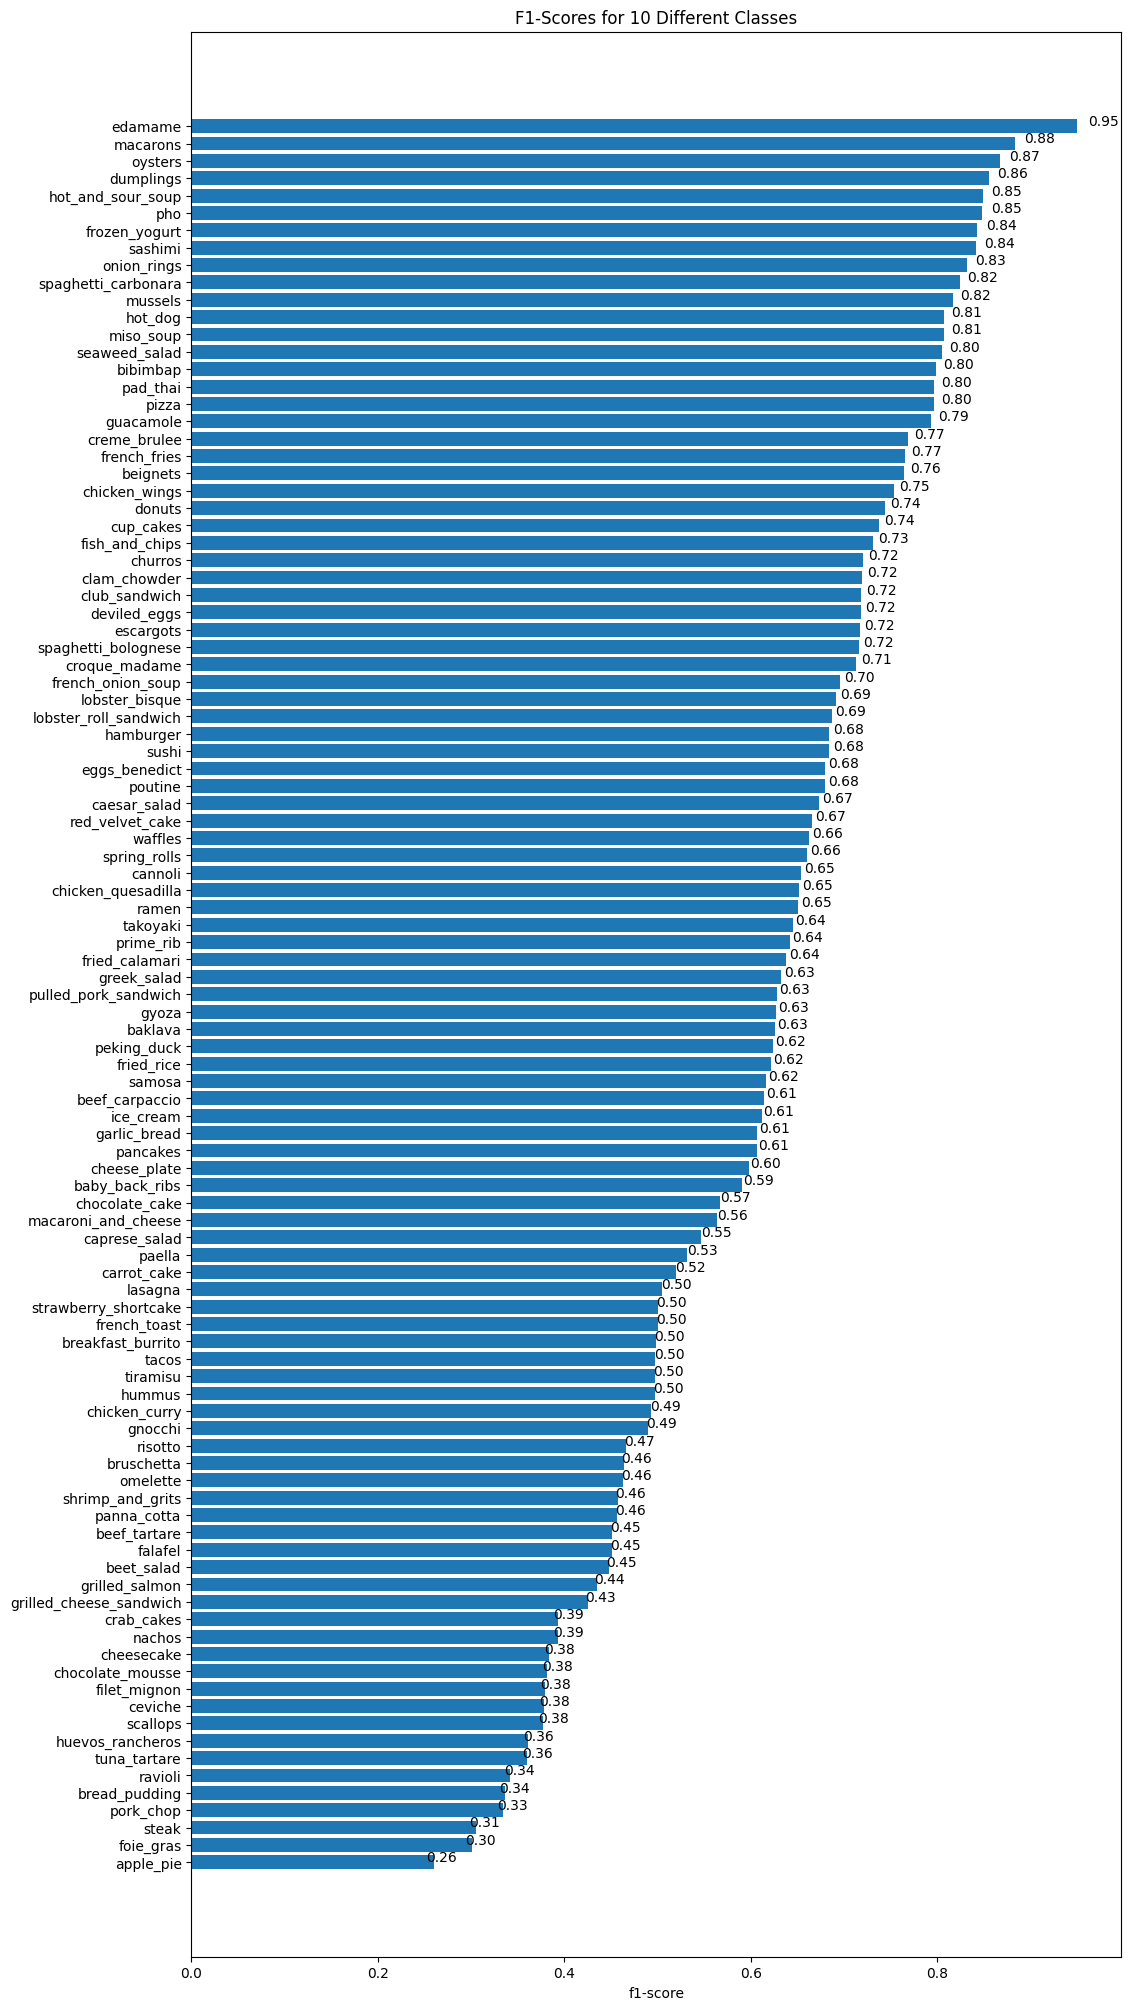

In [50]:
import matplotlib.pyplot as plt

# Plot
fig, ax = plt.subplots(figsize=(12, 25))
scores = ax.barh(range(len(f1_scores)), f1_scores["f1-score"].values)
ax.set_yticks(range(len(f1_scores)))
ax.set_yticklabels(list(f1_scores["class_name"]))
ax.set_xlabel("f1-score")
ax.set_title("F1-Scores for 10 Different Classes")
ax.invert_yaxis();


def autolabel(rects):
  """
  The function attaches a text label above each bar displaying its height (it's value).
  """
  for rect in rects:
    width = rect.get_width()
    ax.text(1.03*width, rect.get_y() + rect.get_height()/1.5,
            f"{width:.2f}",
            ha='center', va='bottom')

autolabel(scores)

The analysis reveals the model's performance on an individual class basis. The model demonstrates suboptimal results for classes such as 'foie_gras' and 'bread_pudding', while it shows exceptional accuracy for classes like 'edamame' and 'pho'. These observations suggest potential areas for improvement in the future experiments. We might need to augment the dataset for the poorly performing classes, or it may be that these classes inherently pose greater prediction challenges. It is also noteworthy that our current evaluation has been conducted using only **10%** of the total available data.


### Visualizing predictions on test images

To visualize the model's predictions on actual images, we will implement a function named 'load_and_prep_image()'. This function will facilitate the loading of an image into a tensor, enabling us to make predictions on any given image:

In [51]:
def load_and_prep_image(filename, img_shape=224, scale=True):
  """
  The functions reads-in an image from a filename, turns it into a tensor and reshapes into the (224, 224, 3) shape - the same size as the images our model has been trained on.

  Parameters
  ----------
  filename (str): string filename of target image.
  img_shape (int): size to resize target image to, default 224.
  scale (bool): whether to scale pixel values to range(0, 1), default True.
  """
  # Read-in the image
  img = tf.io.read_file(filename)
  # Decode the image into a tensor
  img = tf.io.decode_image(img)
  # Resize the image
  img = tf.image.resize(img, [img_shape, img_shape])
  if scale:
    # Rescale the image (get all values between 0 and 1)
    return img/255.
  else:
    return img

Let's now proceed to make predictions on a series of randomly selected images:

1/1 [==============================] - 0s 46ms/step


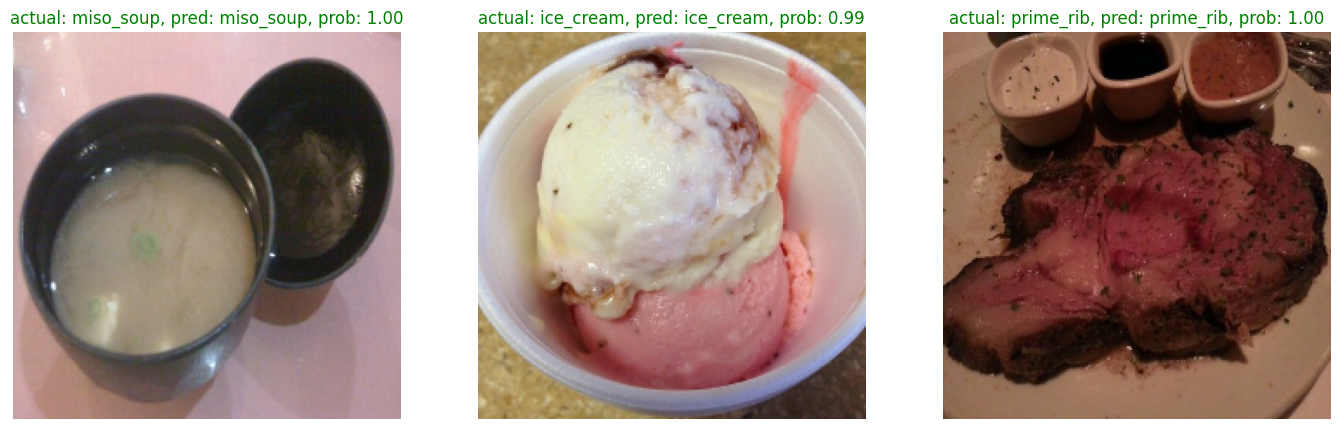

In [52]:
import os
import random

# Plot
plt.figure(figsize=(17, 10))
for i in range(3):
  # Select a random image from a random class
  class_name = random.choice(class_names)
  filename = random.choice(os.listdir(test_dir + "/" + class_name))
  filepath = test_dir + class_name + "/" + filename

  # Load the image and make predictions, and don't scale images for the predictions since the 'EfficientNet' model already has it built-in
  img = load_and_prep_image(filepath, scale=False)
  # Make sure to expand the dimension, since our model accepts tensors of shape [None, 224, 224, 3]
  pred_prob = model.predict(tf.expand_dims(img, axis=0))
  # Get the predicted class
  pred_class = class_names[pred_prob.argmax()]

  # Plot the images
  plt.subplot(1, 3, i+1)
  plt.imshow(img/255.)

  # Change the color of text based on whether the prediction is correct or not
  if class_name == pred_class:
    title_color = "g"
  else:
    title_color = "r"
  plt.title(f"actual: {class_name}, pred: {pred_class}, prob: {pred_prob.max():.2f}", c=title_color)
  plt.axis(False);

### Finding the most wrong predictions

Firstly, let's retrieve the filenames of all the test data:

In [53]:
# Create an empty list for storing the filepaths
filepaths = []

for filepath in test_data.list_files("101_food_classes_10_percent/test/*/*.jpg",
                                     shuffle=False):
  filepaths.append(filepath.numpy())

filepaths[:10]

[b'101_food_classes_10_percent/test/apple_pie/1011328.jpg',
 b'101_food_classes_10_percent/test/apple_pie/101251.jpg',
 b'101_food_classes_10_percent/test/apple_pie/1034399.jpg',
 b'101_food_classes_10_percent/test/apple_pie/103801.jpg',
 b'101_food_classes_10_percent/test/apple_pie/1038694.jpg',
 b'101_food_classes_10_percent/test/apple_pie/1047447.jpg',
 b'101_food_classes_10_percent/test/apple_pie/1068632.jpg',
 b'101_food_classes_10_percent/test/apple_pie/110043.jpg',
 b'101_food_classes_10_percent/test/apple_pie/1106961.jpg',
 b'101_food_classes_10_percent/test/apple_pie/1113017.jpg']

Construct a DataFrame from the current prediction data to facilitate further analysis:

In [54]:
import pandas as pd

pred_df = pd.DataFrame({"img_path": filepaths,
                        "y_true": y_labels,
                        "y_pred": pred_classes,
                        "pred_conf": pred_probs.max(axis=1),
                        "y_true_classname": [class_names[i] for i in y_labels],
                        "y_pred_classname": [class_names[i] for i in pred_classes]})

pred_df.head()

img_path  y_true  y_pred  \
0  b'101_food_classes_10_percent/test/apple_pie/1...       0      28   
1  b'101_food_classes_10_percent/test/apple_pie/1...       0       0   
2  b'101_food_classes_10_percent/test/apple_pie/1...       0       0   
3  b'101_food_classes_10_percent/test/apple_pie/1...       0       8   
4  b'101_food_classes_10_percent/test/apple_pie/1...       0       8   

   pred_conf y_true_classname y_pred_classname  
0   0.262607        apple_pie    croque_madame  
1   0.979221        apple_pie        apple_pie  
2   0.696813        apple_pie        apple_pie  
3   0.382907        apple_pie    bread_pudding  
4   0.525661        apple_pie    bread_pudding

Let's enhance the dataframe by adding a column to indicate the accuracy of the predictions:

In [55]:
pred_df["pred_correct"] = pred_df["y_true"] == pred_df["y_pred"]
pred_df.head()

img_path  y_true  y_pred  \
0  b'101_food_classes_10_percent/test/apple_pie/1...       0      28   
1  b'101_food_classes_10_percent/test/apple_pie/1...       0       0   
2  b'101_food_classes_10_percent/test/apple_pie/1...       0       0   
3  b'101_food_classes_10_percent/test/apple_pie/1...       0       8   
4  b'101_food_classes_10_percent/test/apple_pie/1...       0       8   

   pred_conf y_true_classname y_pred_classname  pred_correct  
0   0.262607        apple_pie    croque_madame         False  
1   0.979221        apple_pie        apple_pie          True  
2   0.696813        apple_pie        apple_pie          True  
3   0.382907        apple_pie    bread_pudding         False  
4   0.525661        apple_pie    bread_pudding         False

Next, we will identify the 100 most incorrect predictions by sorting the incorrect classifications based on descending prediction probabilities:

In [56]:
top_100_wrong = pred_df[pred_df["pred_correct"] == False].sort_values("pred_conf", ascending=False)[:100]
top_100_wrong.head(20)

img_path  y_true  y_pred  \
23797  b'101_food_classes_10_percent/test/sushi/16593...      95      86   
18001  b'101_food_classes_10_percent/test/pancakes/10...      72      67   
191    b'101_food_classes_10_percent/test/apple_pie/3...       0      31   
11642  b'101_food_classes_10_percent/test/garlic_brea...      46      10   
10741  b'101_food_classes_10_percent/test/french_toas...      42       1   
23631  b'101_food_classes_10_percent/test/strawberry_...      94      83   
10847  b'101_food_classes_10_percent/test/fried_calam...      43      68   
7194   b'101_food_classes_10_percent/test/croque_mada...      28       7   
17855  b'101_food_classes_10_percent/test/paella/2314...      71      65   
15826  b'101_food_classes_10_percent/test/macarons/19...      63      29   
14482  b'101_food_classes_10_percent/test/hummus/8476...      57      51   
13144  b'101_food_classes_10_percent/test/gyoza/31214...      52      92   
18935  b'101_food_classes_10_percent/test/pho/3741977...      75      33   
9326   b'101_food_classes_10_percent/test/filet_migno...      37      79   
12487  b'101_food_classes_10_percent/test/grilled_che...      49      25   
8794   b'101_food_classes_10_percent/test/escargots/1...      35      41   
22511  b'101_food_classes_10_percent/test/spaghetti_b...      90      78   
24007  b'101_food_classes_10_percent/test/tacos/11193...      96      19   
3229   b'101_food_classes_10_percent/test/cannoli/726...      12       1   
23300  b'101_food_classes_10_percent/test/steak/17945...      93       1   

       pred_conf         y_true_classname    y_pred_classname  pred_correct  
23797   0.997797                    sushi             sashimi         False  
18001   0.997590                 pancakes            omelette         False  
191     0.997340                apple_pie              donuts         False  
11642   0.996427             garlic_bread          bruschetta         False  
10741   0.996024             french_toast      baby_back_ribs         False  
23631   0.995625     strawberry_shortcake     red_velvet_cake         False  
10847   0.994743           fried_calamari         onion_rings         False  
7194    0.994612            croque_madame            bibimbap         False  
17855   0.994237                   paella             mussels         False  
15826   0.993386                 macarons           cup_cakes         False  
14482   0.992086                   hummus           guacamole         False  
13144   0.991634                    gyoza        spring_rolls         False  
18935   0.991130                      pho             edamame         False  
9326    0.990516             filet_mignon           prime_rib         False  
12487   0.990414  grilled_cheese_sandwich       club_sandwich         False  
8794    0.990339                escargots   french_onion_soup         False  
22511   0.990197      spaghetti_bolognese             poutine         False  
24007   0.989653                    tacos  chicken_quesadilla         False  
3229    0.989548                  cannoli      baby_back_ribs         False  
23300   0.989198                    steak      baby_back_ribs         False

Let's examine and visualize some of the most incorrect predictions:

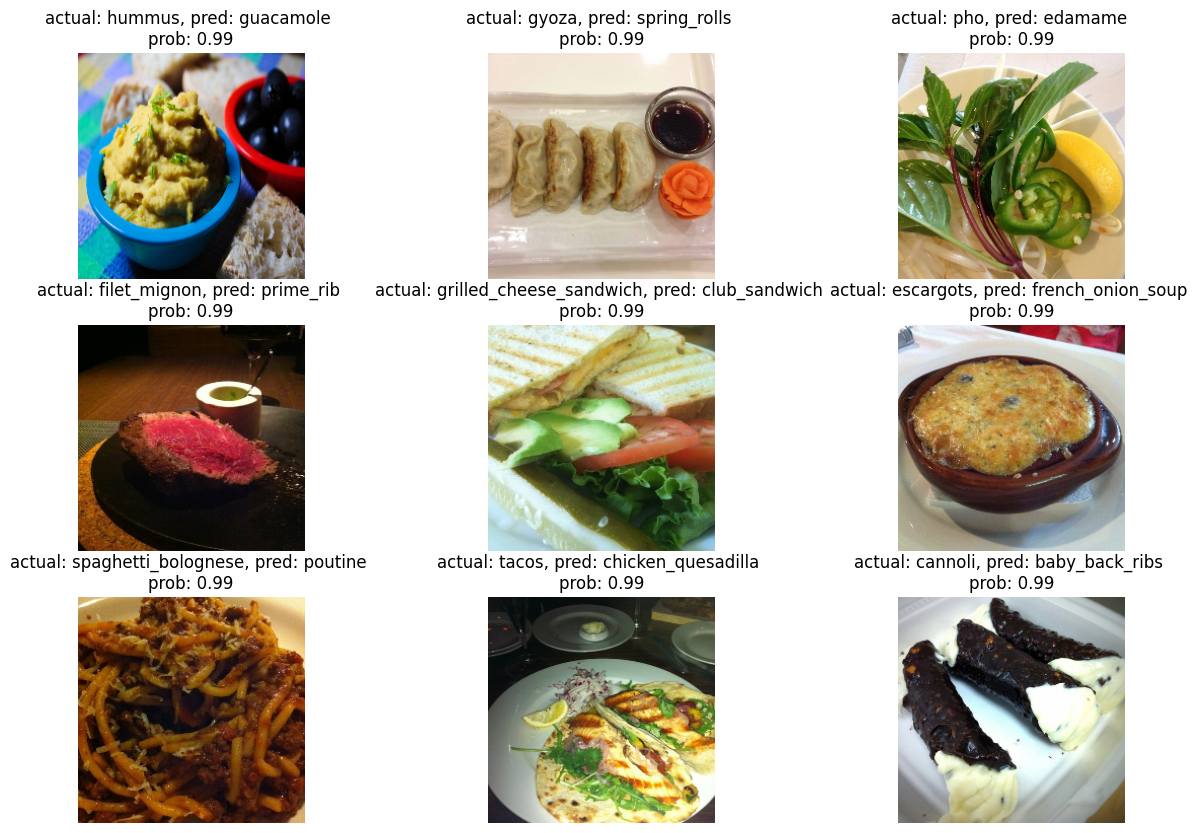

In [57]:
images_to_view = 9
start_index = 10

# Plot
plt.figure(figsize=(15, 10))
for i, row in enumerate(top_100_wrong[start_index:start_index+images_to_view].itertuples()):
  plt.subplot(3, 3, i+1)
  img = load_and_prep_image(row[1], scale=True)
  # Select only a few parameters of each row
  _, _, _, _, pred_prob, y_true, y_pred, _ = row
  plt.imshow(img)
  plt.title(f"actual: {y_true}, pred: {y_pred} \nprob: {pred_prob:.2f}")
  plt.axis(False)

## Test out the model on test images and custom images of food

Thus far, we have visualized several predictions made by the model on the test set. Now, we will leverage the model to generate predictions on a custom set of food images.

I have curated a small dataset consisting of a few images depicting various foods. Let's proceed by downloading and unzipping this dataset:

In [58]:
# Download some custom images from Google Storage
# !wget https://storage.googleapis.com/ztm_tf_course/food_vision/custom_food_images.zip
!ls "/content/drive/My Drive/Colab Notebooks"

101_food_class_10_percent_model
BTC_Price_Predictor.ipynb
custom_food_images.zip
Food_Image_101_classes_Classifier_Computer_Vision.ipynb
Food_Image_Deca_Classifier_Computer_Vision.ipynb
Organizing_The_Food101_Dataset.ipynb
Prop_Predict.ipynb


In [60]:
# Step 2: Copy the file from Google Drive to Colab's local file system
!cp /content/drive/My\ Drive/Colab\ Notebooks/custom_food_images.zip /content/

unzip_data("/content/custom_food_images.zip")

In [63]:
# Get a list of the custom images filepaths
custom_food_images = ["custom_food_images/" + img_path for img_path in os.listdir("custom_food_images")]
custom_food_images

['custom_food_images/steak.jpeg',
 'custom_food_images/chicken_wings.jpeg',
 'custom_food_images/hamburger.jpeg',
 'custom_food_images/.ipynb_checkpoints',
 'custom_food_images/sushi.jpeg',
 'custom_food_images/ramen.jpeg']

Let's make predictions on custom food images:

In [66]:
# Ensure to filter out directories
custom_food_images = ["custom_food_images/" + img_path for img_path in os.listdir("custom_food_images") if os.path.isfile("custom_food_images/" + img_path)]

1/1 [==============================] - 0s 28ms/step


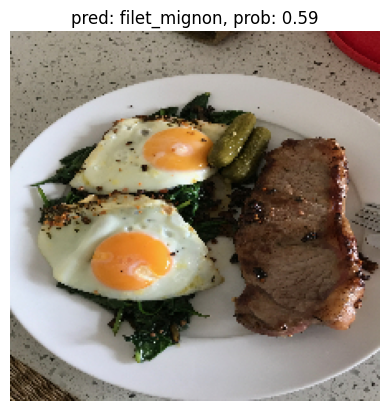

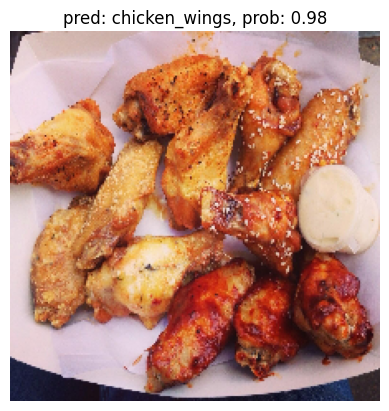

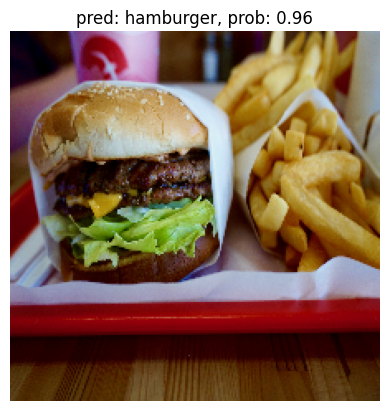

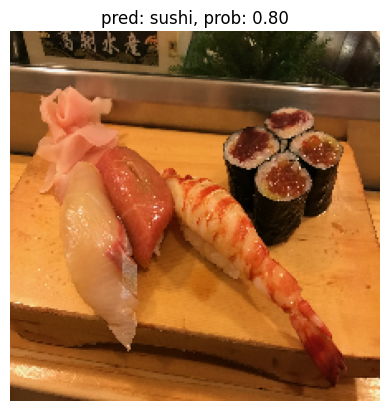

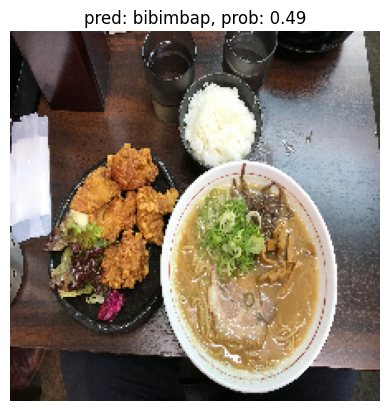

In [69]:
for img in custom_food_images:
  # Load-in the target image and turn it into tensor
  img = load_and_prep_image(img, scale=False)

  # Make prediction on an image with a shape of [None, 224, 224, 3]
  pred_prob = model.predict(tf.expand_dims(img, axis=0))

  # GEt the predicted class label
  pred_class = class_names[pred_prob.argmax()]

  # Plot the image with the appropriate annotations
  plt.figure()
  # Float inputs needs to be normalized
  plt.imshow(img/255.)
  plt.title(f"pred: {pred_class}, prob: {pred_prob.max():.2f}")
  plt.axis(False)

The model has demonstrated nice results, surpassing the original [Food101 paper](https://data.vision.ee.ethz.ch/cvl/datasets_extra/food-101/static/bossard_eccv14_food-101.pdf), using only **10%** of the training data. With these encouraging outcomes, we will now utilize **100%** of the training data to build two additional models and conduct further experiments, aiming to exceed the performance of the [DeepFood](https://www.researchgate.net/publication/304163308_DeepFood_Deep_Learning-Based_Food_Image_Recognition_for_Computer-Aided_Dietary_Assessment) model — a 2016 study that achieved a 77.4% top-1 accuracy after training a CNN for 2-3 days.

Top-1 accuracy refers to the accuracy based on the highest softmax activation value output by the model, meaning the "softmax" activation function ouputs a value for every class, but with 'top-1' only the highest predicted value for each class is considered.

**Note:** We will use 100% of the training data from the 'food-101' dataset provided by TensorFlow Datasets [TFDS datasets](https://www.tensorflow.org/datasets/overview), which is identical to the 'food-101' dataset from Kaggle that we have used thus far. However, unlike Kaggle datasets, TFDS datasets are static, prepared, and ready to use with TensorFlow, already formatted as Tensors.

## Experiments with the 'food-101' dataset from TFDS (100% of train data)



### Get the data

In [70]:
# Get access to the TFDS
import tensorflow_datasets as tfds

In [71]:
# Getting all the vailable datasets in TFDS
datasets_list = tfds.list_builders()

# Find out if the 'food101' dataset exists in TFDS
target_dataset = "food101"
print(f"'{target_dataset}' in TensorFlow Datasets: {target_dataset in datasets_list}")

'food101' in TensorFlow Datasets: True


In [72]:
# Load in the dataset from TFDS
(train_data, test_data), ds_info = tfds.load(name="food101",
                                             split=["train", "validation"],
                                             shuffle_files=True,
                                             as_supervised=True,
                                             with_info=True)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/75750 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/food101/2.0.0.incomplete6I6YEM/food101-train.tfrecord*...:   0%|          …

Generating validation examples...:   0%|          | 0/25250 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/food101/2.0.0.incomplete6I6YEM/food101-validation.tfrecord*...:   0%|     …

Dataset food101 downloaded and prepared to /root/tensorflow_datasets/food101/2.0.0. Subsequent calls will reuse this data.


### Inspect the data

In [73]:
# Display the features the dataset
ds_info.features

FeaturesDict({
    'image': Image(shape=(None, None, 3), dtype=uint8),
    'label': ClassLabel(shape=(), dtype=int64, num_classes=101),
})

In [74]:
# Display the class names in the dataset
class_names = ds_info.features["label"].names
class_names[:10]

['apple_pie',
 'baby_back_ribs',
 'baklava',
 'beef_carpaccio',
 'beef_tartare',
 'beet_salad',
 'beignets',
 'bibimbap',
 'bread_pudding',
 'breakfast_burrito']

In [75]:
# Display one sample off the training data
train_one_sample = train_data.take(1)
train_one_sample

<_TakeDataset element_spec=(TensorSpec(shape=(None, None, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>

Let's iterate through the single training sample we've obtained to extract pertinent information about it:

In [76]:
for image, label in train_one_sample:
  print(f"""
  Image shape: {image.shape}
  Image dtype: {image.dtype}
  Target class from Food101 (tensor form): {label}
  Class name (str form): {class_names[label.numpy()]}
        """)


  Image shape: (512, 289, 3)
  Image dtype: <dtype: 'uint8'>
  Target class from Food101 (tensor form): 45
  Class name (str form): frozen_yogurt
        


In [77]:
# Let's see what does an image tensor looks like in a tensor format
image

<tf.Tensor: shape=(512, 289, 3), dtype=uint8, numpy=
array([[[145, 151, 125],
        [157, 163, 137],
        [159, 165, 139],
        ...,
        [197, 209, 199],
        [197, 209, 199],
        [197, 207, 198]],

       [[146, 152, 126],
        [156, 162, 136],
        [158, 164, 138],
        ...,
        [197, 209, 199],
        [197, 209, 199],
        [199, 209, 200]],

       [[150, 156, 130],
        [155, 161, 135],
        [157, 163, 137],
        ...,
        [197, 209, 199],
        [197, 209, 199],
        [199, 209, 198]],

       ...,

       [[173, 186, 177],
        [174, 187, 178],
        [176, 189, 180],
        ...,
        [181, 197, 187],
        [181, 197, 187],
        [178, 195, 187]],

       [[176, 187, 179],
        [176, 187, 179],
        [176, 189, 180],
        ...,
        [182, 198, 188],
        [182, 198, 188],
        [180, 197, 189]],

       [[178, 189, 181],
        [177, 188, 180],
        [175, 188, 179],
        ...,
        [179, 195, 18

In [78]:
# Dispaly the min and max values of the image tensor
tf.reduce_min(image), tf.reduce_max(image)

(<tf.Tensor: shape=(), dtype=uint8, numpy=0>,
 <tf.Tensor: shape=(), dtype=uint8, numpy=255>)

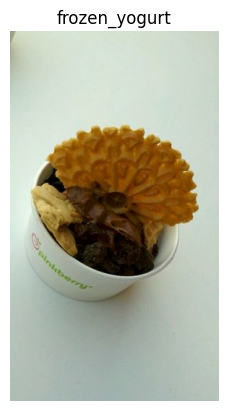

In [81]:
# Plot an image tensor
import matplotlib.pyplot as plt

plt.imshow(image)
plt.title(class_names[label.numpy()])
plt.axis(False);

### Preprocess the data

**Inspection Insights Summary:**

The dataset from TFDS currently exhibits the following characteristics:
- **Data Type:** uint8
- **Tensor Sizes:** Varying dimensions (different sized images)
- **Pixel Values:** Unscaled (ranging from 0 to 255)

However, models typically require data to be:
- **Data Type:** float32
- **Tensor Sizes:** Uniform dimensions (e.g., (224, 224, 3) for batches)
- **Pixel Values:** Scaled (normalized to a range between 0 and 1)

To meet these requirements, we will implement a function named 'preprocess_img()' that preprocesses images as follows:
- **Resize:** Adjust the input image tensor to a specified size using tf.image.resize().
- **Convert Data Type:** Change the input image tensor's data type to tf.float32 using tf.cast().

In [82]:
def preprocess_img(image, label, img_shape=224):
    """
    The function converts an image datatype from 'uint8' to 'float32', and reshapes the image to [img_shape, img_shape, color_channels].
    """
    image = tf.image.resize(image, [img_shape, img_shape])
    return tf.cast(image, tf.float32), label

Let's test out the function on a target image:

In [83]:
# Preprocess a single sample image and print the outputs
preprocessed_img = preprocess_img(image, label)[0]
print(f"Image before preprocessing:\n {image[:2]}...,\nShape: {image.shape},\nDatatype: {image.dtype}\n")
print(f"Image after preprocessing:\n {preprocessed_img[:2]}...,\nShape: {preprocessed_img.shape},\nDatatype: {preprocessed_img.dtype}")

Image before preprocessing:
 [[[145 151 125]
  [157 163 137]
  [159 165 139]
  ...
  [197 209 199]
  [197 209 199]
  [197 207 198]]

 [[146 152 126]
  [156 162 136]
  [158 164 138]
  ...
  [197 209 199]
  [197 209 199]
  [199 209 200]]]...,
Shape: (512, 289, 3),
Datatype: <dtype: 'uint8'>

Image after preprocessing:
 [[[147.19739 153.19739 127.19739]
  [157.22768 163.22768 137.22768]
  [158.09805 164.09805 138.09805]
  ...
  [197.      209.      197.54907]
  [197.      209.      199.     ]
  [198.09914 208.38936 199.24425]]

 [[154.69467 160.69467 134.69467]
  [155.87053 161.87053 135.87053]
  [158.39908 164.39908 138.39908]
  ...
  [197.      209.      197.54907]
  [197.      209.      199.     ]
  [196.32831 206.61853 195.76364]]]...,
Shape: (224, 224, 3),
Datatype: <dtype: 'float32'>


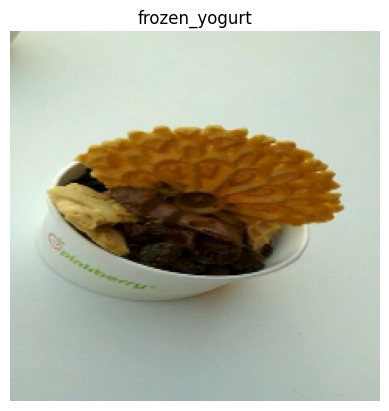

In [84]:
# Visualize it
plt.imshow(preprocessed_img/255.)
plt.title(class_names[label])
plt.axis(False);

To enhance memory efficiency and expedite data loading, it is essential to preprocess our data by organizing it into batches prior to modeling:

In [85]:
# Map the preprocessing function (we have created earlier) to the 'train_data', and paralellize
train_data = train_data.map(map_func=preprocess_img, num_parallel_calls=tf.data.AUTOTUNE)
# Shuffle the 'train_data', and turn it into batches and prefetch it
train_data = train_data.shuffle(buffer_size=1000).batch(batch_size=32).prefetch(buffer_size=tf.data.AUTOTUNE)

In [86]:
# Map the preprocessing function (we have created earlier) to the 'test_data', and paralellize
test_data = test_data.map(preprocess_img, num_parallel_calls=tf.data.AUTOTUNE)
# Turn 'test_data' into batches and prefetch it without shufflling
test_data = test_data.batch(32).prefetch(tf.data.AUTOTUNE)

In [87]:
# Dispaly the prepared train and test sets
train_data, test_data

(<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>,
 <_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>)

### Create and Evaluate with 'model_3' - Transfer Learning Feature Extraction model, using the Keras Functional API

We will now implement a 'ModelCheckpoint' callback that saves only the model's weights. This approach ensures that only the optimal weights are retained after each epoch, rather than the entire model:

In [88]:
# Define the ModelCheckpoint path
checkpoint_path = "model_checkpoints/cp.ckpt"

# Create the ModelCheckpoint callback
model_checkpoint = tf.keras.callbacks.ModelCheckpoint(checkpoint_path,
                                                      monitor="val_accuracy",
                                                      save_best_only=True,
                                                      save_weights_only=True,
                                                      verbose=0)

Let's enable **'mixed precision training'** to accelerate the execution process:

In [89]:
from tensorflow.keras import mixed_precision

mixed_precision.set_global_policy(policy="mixed_float16")

In [90]:
# Check the global dtype policy (the policy which will be used by layers in the model)
mixed_precision.global_policy()

<Policy "mixed_float16">

Now, let's construct the Transfer Learning Feature Extraction model using the Keras Functional API:

In [91]:
from tensorflow.keras import layers

# Define the data's shape to the input layer of the model
input_shape = (224, 224, 3)
# Create a 'EfficientNetV2B0' base model with tf.keras.applications
base_model = tf.keras.applications.EfficientNetB0(include_top=False) # Setting 'include_top' to 'False', because we will create our own top layers, which are the output layers for the model
# Freeze all the weights in the 'base_model' pre-trained model, so the pre-learned patterns remain as they currently are
base_model.trainable = False

# Create an input layer for the model
inputs = layers.Input(shape=input_shape, name="input_layer")
# Pass the inputs to the 'base_model' while keeping it in inference mode by setting the 'training' to 'False', so it won't get updated
x = base_model(inputs, training=False)
# Average pool the outputs of the base model - aggregate all the most important information, and reduce the number of computations
x = layers.GlobalAveragePooling2D(name="pooling_layer")(x)
# Create the output layer
x = layers.Dense(len(class_names))(x)
# Create a separate activation layer from the output layer, so we can output float32 activations
outputs = layers.Activation("softmax", dtype=tf.float32, name="softmax_float32")(x)
# Combine the inputs and the outputs into 'model_3'
model = tf.keras.Model(inputs, outputs)

# Compile the model
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

In [92]:
# Display the summary of the model
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetb0 (Functional  (None, None, None, 1280   4049571   
 )                           )                                   
                                                                 
 pooling_layer (GlobalAvera  (None, 1280)              0         
 gePooling2D)                                                    
                                                                 
 dense (Dense)               (None, 101)               129381    
                                                                 
 softmax_float32 (Activatio  (None, 101)               0         
 n)                                                              
                                                           

In [93]:
# Display the 'dtype_policy' attributes of the layers in the model
for layer in model.layers:
    print(layer.name, layer.trainable, layer.dtype, layer.dtype_policy) # Check the dtype policy of layers

input_layer True float32 <Policy "float32">
efficientnetb0 False float32 <Policy "mixed_float16">
pooling_layer True float32 <Policy "mixed_float16">
dense True float32 <Policy "mixed_float16">
softmax_float32 True float32 <Policy "float32">


In [94]:
# Display the first 20 layers in the 'base_model' and display their dtype's policy
for layer in model.layers[1].layers[:20]:
    print(layer.name, layer.trainable, layer.dtype, layer.dtype_policy)

input_2 False float32 <Policy "float32">
rescaling_2 False float32 <Policy "mixed_float16">
normalization_1 False float32 <Policy "mixed_float16">
rescaling_3 False float32 <Policy "mixed_float16">
stem_conv_pad False float32 <Policy "mixed_float16">
stem_conv False float32 <Policy "mixed_float16">
stem_bn False float32 <Policy "mixed_float16">
stem_activation False float32 <Policy "mixed_float16">
block1a_dwconv False float32 <Policy "mixed_float16">
block1a_bn False float32 <Policy "mixed_float16">
block1a_activation False float32 <Policy "mixed_float16">
block1a_se_squeeze False float32 <Policy "mixed_float16">
block1a_se_reshape False float32 <Policy "mixed_float16">
block1a_se_reduce False float32 <Policy "mixed_float16">
block1a_se_expand False float32 <Policy "mixed_float16">
block1a_se_excite False float32 <Policy "mixed_float16">
block1a_project_conv False float32 <Policy "mixed_float16">
block1a_project_bn False float32 <Policy "mixed_float16">
block2a_expand_conv False float

In [95]:
# Turn off all the warnings, except of the errors
tf.get_logger().setLevel('ERROR')

# Fit the model
history_101_food_classes_feature_extract = model.fit(train_data,
                                                     epochs=3,
                                                     steps_per_epoch=len(train_data),
                                                     validation_data=test_data,
                                                     # For a faster training process we validate only on 15% of the test set
                                                     validation_steps=int(0.15 * len(test_data)),
                                                     callbacks=[create_tensorboard_callback("training_logs",
                                                                                            "efficientnetb0_101_classes_all_data_feature_extract"),
                                                                model_checkpoint])

Saving TensorBoard log files to: training_logs/efficientnetb0_101_classes_all_data_feature_extract/20240526-114455
Epoch 1/3
2368/2368 [==============================] - 199s 80ms/step - loss: 1.7195 - accuracy: 0.5814 - val_loss: 1.1361 - val_accuracy: 0.6936
Epoch 2/3
2368/2368 [==============================] - 178s 74ms/step - loss: 1.2002 - accuracy: 0.6887 - val_loss: 1.0237 - val_accuracy: 0.7201
Epoch 3/3
2368/2368 [==============================] - 188s 79ms/step - loss: 1.0550 - accuracy: 0.7242 - val_loss: 0.9984 - val_accuracy: 0.7275


In [96]:
# Evaluate the unsaved version of the model on the entire test set
results_feature_extract_model = model.evaluate(test_data)
results_feature_extract_model

790/790 [==============================] - 50s 63ms/step - loss: 0.9981 - accuracy: 0.7304


[0.9980705380439758, 0.7304158210754395]

Let's proceed by loading and evaluating the checkpoint weights of the model, but before that, we will implement a function named 'create_model()' to reconstruct the original model architecture:

In [97]:
def create_model():
  # Define the data's shape to the input layer of the model
  input_shape = (224, 224, 3)
  # Create a 'EfficientNetV2B0' base model with tf.keras.applications
  base_model = tf.keras.applications.efficientnet.EfficientNetB0(include_top=False) # Setting 'include_top' to 'False', because we will create our own top layers, which are the output layers for the model
  # Freeze all the weights in the 'base_model' pre-trained model, so the pre-learned patterns remain as they currently are
  base_model.trainable = False

  # Create an input layer to the model
  inputs = layers.Input(shape=input_shape, name="input_layer")
  # Pass the inputs to the 'base_model' while keeping it in inference mode by setting the 'training' to 'False', so it won't get updated
  x = base_model(inputs, training=False)
  # Average pool the outputs of the base model - aggregate all the most important information, and reduce the number of computations
  x = layers.GlobalAveragePooling2D(name="pooling_layer")(x)
  # Create the output layer
  x = layers.Dense(len(class_names))(x)
  # Create a separate activation layer from the output layer, so we can output float32 activations
  outputs = layers.Activation("softmax", dtype=tf.float32, name="softmax_float32")(x)
  # Combine the inputs and the outputs into a 'model'
  model = tf.keras.Model(inputs, outputs)

  return model

# Create and compile a new version of the original model (new weights)
created_model = create_model()
created_model.compile(loss="sparse_categorical_crossentropy",
                      optimizer=tf.keras.optimizers.Adam(),
                      metrics=["accuracy"])

# Load the saved weights
created_model.load_weights(checkpoint_path)

# Evaluate the model with loaded weights
results_created_model_with_loaded_weights = created_model.evaluate(test_data)

790/790 [==============================] - 57s 69ms/step - loss: 0.9981 - accuracy: 0.7304


In [98]:
import numpy as np

# The loaded checkpoint weights should be very similar to the checkpoint weights prior to saving
assert np.isclose(results_feature_extract_model, results_created_model_with_loaded_weights).all(), "Loaded weights results are not close to original model."  # check if all elements in array are close

In [99]:
# Display the first 20 layers of the 'base_model' and display their dtype's policy
for layer in created_model.layers[1].layers[:20]:
    print(layer.name, layer.trainable, layer.dtype, layer.dtype_policy)

input_3 False float32 <Policy "float32">
rescaling_4 False float32 <Policy "mixed_float16">
normalization_2 False float32 <Policy "mixed_float16">
rescaling_5 False float32 <Policy "mixed_float16">
stem_conv_pad False float32 <Policy "mixed_float16">
stem_conv False float32 <Policy "mixed_float16">
stem_bn False float32 <Policy "mixed_float16">
stem_activation False float32 <Policy "mixed_float16">
block1a_dwconv False float32 <Policy "mixed_float16">
block1a_bn False float32 <Policy "mixed_float16">
block1a_activation False float32 <Policy "mixed_float16">
block1a_se_squeeze False float32 <Policy "mixed_float16">
block1a_se_reshape False float32 <Policy "mixed_float16">
block1a_se_reduce False float32 <Policy "mixed_float16">
block1a_se_expand False float32 <Policy "mixed_float16">
block1a_se_excite False float32 <Policy "mixed_float16">
block1a_project_conv False float32 <Policy "mixed_float16">
block1a_project_bn False float32 <Policy "mixed_float16">
block2a_expand_conv False float

In [100]:
# Save the model to Google Drive so it can be used later
save_dir = "efficientnetb0_feature_extract_model_mixed_precision"
model.save(save_dir)

The feature-extraction model has shown significant promise after just three epochs. Given the extensive dataset at our disposal (**100%** of the data), it is prudent to explore the potential benefits of fine-tuning, which is particularly effective with large datasets.

**A reminder on fine-tuning:** The traditional workflow involves initially freezing a pre-trained base model and training only the output layers for a few iterations to align their weights with the custom data (feature extraction). Subsequently, we unfreeze a select number or all of the layers in the base model and continue training until the model's performance plateaus.

### Create and Evaluate with 'model_4' - Transfer Learning Fine Tuning model, using the Keras Functional API

As previously outlined, the 'model_4' experiment entails applying Transfer Learning through **Fine-Tuning** the 'model_3' checkpoint, utilizing **100%** of the training data. This approach involves tailoring the pre-trained model to more accurately align with our specific dataset. Specifically, we will retain the same base model, unfreeze select top layers, and proceed with training the model for additional epochs.

In [101]:
# Load the saved model
loaded_saved_model = tf.keras.models.load_model(save_dir)

In [102]:
# Display the first 20 layers in the 'base_model' and display their dtype's policy
for layer in loaded_saved_model.layers[1].layers[:20]:
    print(layer.name, layer.trainable, layer.dtype, layer.dtype_policy)

input_2 True float32 <Policy "float32">
rescaling_2 False float32 <Policy "mixed_float16">
normalization_1 False float32 <Policy "mixed_float16">
rescaling_3 False float32 <Policy "mixed_float16">
stem_conv_pad False float32 <Policy "mixed_float16">
stem_conv False float32 <Policy "mixed_float16">
stem_bn False float32 <Policy "mixed_float16">
stem_activation False float32 <Policy "mixed_float16">
block1a_dwconv False float32 <Policy "mixed_float16">
block1a_bn False float32 <Policy "mixed_float16">
block1a_activation False float32 <Policy "mixed_float16">
block1a_se_squeeze False float32 <Policy "mixed_float16">
block1a_se_reshape False float32 <Policy "mixed_float16">
block1a_se_reduce False float32 <Policy "mixed_float16">
block1a_se_expand False float32 <Policy "mixed_float16">
block1a_se_excite False float32 <Policy "mixed_float16">
block1a_project_conv False float32 <Policy "mixed_float16">
block1a_project_bn False float32 <Policy "mixed_float16">
block2a_expand_conv False float3

In [103]:
# Evaluate the loaded model on the wholte test set
results_loaded_saved_model = loaded_saved_model.evaluate(test_data)
results_loaded_saved_model

790/790 [==============================] - 54s 65ms/step - loss: 0.9981 - accuracy: 0.7304


[0.9980711340904236, 0.7304158210754395]

In [104]:
import numpy as np

# The results of the loaded model's evaluation should should equal or at least be very close to 'results_feature_extract_model' - the model's results prior to saving
assert np.isclose(results_feature_extract_model, results_loaded_saved_model).all()

In [105]:
# Get a summary of the loaded model
loaded_saved_model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetb0 (Functional  (None, None, None, 1280   4049571   
 )                           )                                   
                                                                 
 pooling_layer (GlobalAvera  (None, 1280)              0         
 gePooling2D)                                                    
                                                                 
 dense (Dense)               (None, 101)               129381    
                                                                 
 softmax_float32 (Activatio  (None, 101)               0         
 n)                                                              
                                                           

In [106]:
# Display info about the layers in the loaded model, and set all the layers to trainable
for layer in loaded_saved_model.layers:
    layer.trainable = True # set all layers to trainable
    print(layer.name, layer.trainable, layer.dtype, layer.dtype_policy)

input_layer True float32 <Policy "float32">
efficientnetb0 True float32 <Policy "mixed_float16">
pooling_layer True float32 <Policy "mixed_float16">
dense True float32 <Policy "mixed_float16">
softmax_float32 True float32 <Policy "float32">


In [107]:
# Check the layers in the base model and see what their dtype's policy
for layer in loaded_saved_model.layers[1].layers[:20]:
    print(layer.name, layer.trainable, layer.dtype, layer.dtype_policy)

input_2 True float32 <Policy "float32">
rescaling_2 True float32 <Policy "mixed_float16">
normalization_1 True float32 <Policy "mixed_float16">
rescaling_3 True float32 <Policy "mixed_float16">
stem_conv_pad True float32 <Policy "mixed_float16">
stem_conv True float32 <Policy "mixed_float16">
stem_bn True float32 <Policy "mixed_float16">
stem_activation True float32 <Policy "mixed_float16">
block1a_dwconv True float32 <Policy "mixed_float16">
block1a_bn True float32 <Policy "mixed_float16">
block1a_activation True float32 <Policy "mixed_float16">
block1a_se_squeeze True float32 <Policy "mixed_float16">
block1a_se_reshape True float32 <Policy "mixed_float16">
block1a_se_reduce True float32 <Policy "mixed_float16">
block1a_se_expand True float32 <Policy "mixed_float16">
block1a_se_excite True float32 <Policy "mixed_float16">
block1a_project_conv True float32 <Policy "mixed_float16">
block1a_project_bn True float32 <Policy "mixed_float16">
block2a_expand_conv True float32 <Policy "mixed_f

Let's proceed to configure the necessary callbacks:

In [108]:
# Create a 'EarlyStoppin'g callback to stop the training if the model's 'val_loss' doesn't improve for 3 epochs in a raw
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_loss",
                                                  patience=3)

# Define the ModelCheckpoint path
checkpoint_path = "fine_tune_checkpoints/"

# Create the ModelCheckpoint callback
model_checkpoint = tf.keras.callbacks.ModelCheckpoint(checkpoint_path,
                                                      save_best_only=True,
                                                      monitor="val_loss")

As training progresses and the model approaches its optimal performance, known as **'convergence'**, it is crucial to gradually decrease the learning rate. To achieve this, we will use the 'ReduceLROnPlateau' callback to monitor the validation loss, similar to the 'EarlyStopping' callback. If the validation loss does not improve for 2 or more epochs, the learning rate will be reduced by a factor of 5 (for example, from 0.001 to 0.0002). To ensure the learning rate does not become excessively low and hinder the model's ability to learn, we will set a minimum threshold of 1e-7:

In [109]:
# Create a 'Learning Rate Reduction' callback
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss",
                                                 # multiply the learning rate by 0.2 (reduces by 5x)
                                                 factor=0.2,
                                                 patience=2,
                                                 verbose=1,
                                                 min_lr=1e-7)

In [110]:
# Compile the model
loaded_saved_model.compile(loss="sparse_categorical_crossentropy",
                        optimizer=tf.keras.optimizers.Adam(0.0001), # Decrease the learning rate by 10x for fine-tuning
                        metrics=["accuracy"])

In [111]:
# Fit the model
history_101_food_classes_all_data_fine_tune = loaded_saved_model.fit(train_data,
                                                        epochs=100,
                                                        steps_per_epoch=len(train_data),
                                                        validation_data=test_data,
                                                        # Validate only on 15% of the test set for a faster training
                                                        validation_steps=int(0.15 * len(test_data)),
                                                        # Add the callbacks
                                                        callbacks=[create_tensorboard_callback("training_logs", "efficientb0_101_classes_all_data_fine_tuning"),
                                                                   model_checkpoint,
                                                                   early_stopping,
                                                                   reduce_lr])

Saving TensorBoard log files to: training_logs/efficientb0_101_classes_all_data_fine_tuning/20240526-120026
Epoch 1/100
2368/2368 [==============================] - 465s 175ms/step - loss: 0.8718 - accuracy: 0.7656 - val_loss: 0.7542 - val_accuracy: 0.7834 - lr: 1.0000e-04
Epoch 2/100
2368/2368 [==============================] - 404s 169ms/step - loss: 0.5389 - accuracy: 0.8498 - val_loss: 0.7463 - val_accuracy: 0.7974 - lr: 1.0000e-04
Epoch 3/100
2368/2368 [==============================] - 369s 155ms/step - loss: 0.2994 - accuracy: 0.9148 - val_loss: 0.8611 - val_accuracy: 0.7871 - lr: 1.0000e-04
Epoch 4/100
2368/2368 [==============================] - ETA: 0s - loss: 0.1576 - accuracy: 0.9525
Epoch 4: ReduceLROnPlateau reducing learning rate to 1.9999999494757503e-05.
2368/2368 [==============================] - 373s 156ms/step - loss: 0.1576 - accuracy: 0.9525 - val_loss: 0.9571 - val_accuracy: 0.7802 - lr: 1.0000e-04
Epoch 5/100
2368/2368 [==============================] - 370s 15

 A significant disparity between training loss and validation loss suggests that the model may have overfitted to the training data. However, the fine-tuning process seems to have enhanced the model's performance. Consequently, let's assess it on the full test set to verify if it exceeds the 77.4% accuracy benchmark established by the [DeepFood](https://www.researchgate.net/publication/304163308_DeepFood_Deep_Learning-Based_Food_Image_Recognition_for_Computer-Aided_Dietary_Assessment) paper:

In [112]:
results_loaded_saved_model_fine_tuned = loaded_saved_model.evaluate(test_data)
results_loaded_saved_model_fine_tuned

790/790 [==============================] - 54s 68ms/step - loss: 1.0349 - accuracy: 0.8031


[1.0349080562591553, 0.803128719329834]

In [113]:
# Save the model to Google Drive so it can be used later
save_dir = "efficientnetb0_fine_tuned_101_classes_mixed_precision"
model.save(save_dir)

In [ ]:
# Unmounting Google Drive
drive.flush_and_unmount()

## Conclusion

This notebook and project showcase a robust deep learning computer vision model for food image classification of **101 classes** using transfer learning and fine-tuning techniques. By leveraging the power of transfer learning, we utilized pre-trained models and fine-tuned them to achieve an impressive **80%** accuracy on the full test set, exceeding the 77.4% accuracy benchmark established by the DeepFood paper.

**Key Takeaways:**

- **Transfer Learning Feature Extraction:** By using pre-trained models, we significantly reduced the training time and improved the model's performance, demonstrating the efficiency of transfer learning in computer vision tasks.
- **Transfer Learning Fine-Tuning:** Fine-tuning the model further enhanced its accuracy, allowing it to adapt more effectively to the specific characteristics of our food image dataset.

**Impact of Changes in Model 4:**

In Model 4, we used several advanced techniques, which collectively enhanced the model's ability to generalize better on the test set, resulting in a significant improvement in test accuracy to 80%:
  - **Early Stopping Callback:** Helped prevent overfitting by stopping the training process when the validation loss did not improve for a set number of epochs, ensuring that the model did not train unnecessarily on a stagnant loss.
  - **Model Checkpoint Callback:** Ensured that the best model (with the lowest validation loss) was saved during training, providing a safeguard against potential performance drops in later epochs.
  - **Learning Rate Reduction Callback:** Reduced the learning rate when the validation loss plateaued, allowing for finer adjustments in the learning process and preventing the model from overshooting the minimum validation loss.
  - **Mixed Precision Training:** Maintained efficiency and performance, allowing for faster computations and reduced memory usage without sacrificing accuracy.

These techniques ensured that the model was trained effectively and adapted well to the dataset, demonstrating the importance of a comprehensive fine-tuning strategy.

This project underscores the potential of transfer learning and computer vision techniques in building high-performing image classifiers. The methodologies and insights gained from this project can be applied to a wide range of computer vision applications. Model 4, in particular, highlighted the significance of these advanced strategies, achieving higher validation accuracy over Model 3 and showcasing the benefits of a well-rounded fine-tuning approach in enhancing model generalization and overall performance.